In [84]:
import os
import glob
import pickle

import numpy as np
import pandas as pd
from scipy import signal
from scipy.interpolate import InterpolatedUnivariateSpline
from astropy import units as u
from astropy.time import Time
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

In [122]:
pulsar = '1237+25'

In [123]:
files = sorted(glob.glob('.{0}data_part{0}{1}{0}*{1}.log'.format(os.sep, pulsar)))
print(files)

['.\\data_part\\1237+25\\030518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\040518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\050518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\070518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\080518_00_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\100518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\110518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\120518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\130518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\140518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\150518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\160518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\170518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\180518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\190518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\200518_23_N1_00_part_1237+25.log', '.\\data_part\\1237+25\\210518_23_N1_00_part_1237+25.lo

In [124]:
full_data = []
for file in files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
    full_data.append(data)

In [125]:
fs = 10 # частотота дискретизации временных рядов 
inc = 10000 # Коэффициеон увеличения количества точек сплайна
dict_result  = {}
for data in tqdm_notebook(full_data):
    f, Pxx_den = signal.periodogram(data[3], fs)
    inter_point = max(f)*inc
    spl = InterpolatedUnivariateSpline(f, Pxx_den)
    xs = np.linspace(0, max(f), inter_point) 
    spline = spl(xs)
    points = np.argwhere(np.diff(np.sign(spline - 0.3*np.max(spline)))).flatten()
    points = [i for i in points if xs[i] > 0.009]
    freq = []
    for i in range(1, len(points), 2):
        max_point = np.argmax(spline[points[i - 1]:points[i]])
        freq.append(xs[points[i - 1] + max_point])
    dict_result[int(data[0].mjd)] = pd.Series(freq)
res_table = pd.DataFrame(dict_result).T

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


In [129]:
res_table = res_table.drop(index=58241)

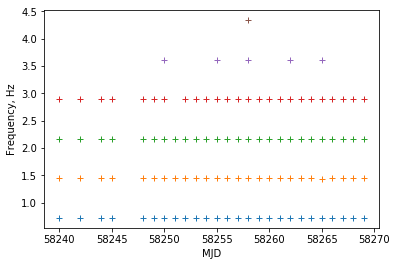

In [130]:
plt.ylabel('Frequency, Hz')
plt.xlabel('MJD')
for i in res_table.columns:
    plt.plot(res_table[i], '+')
plt.show()

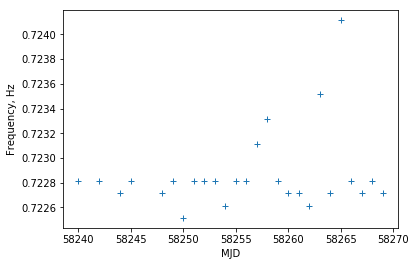

In [131]:
plt.ylabel('Frequency, Hz')
plt.xlabel('MJD')
plt.plot(res_table[0], '+')
plt.show()

In [132]:
print(round(np.median(res_table[0]), 6), '+-', round(np.std(res_table[0]), 6))

0.722814 +- 0.000321
